# Sobreviência a falhas cardíacas
### Feito por Carolina Hirschheimer e Ralph Michaan

O estudo a seguir visa prever, após certo tempo, a <b> sobrevivência </b> de um paciente após ter sofrido uma <b> falha caríaca</b>, a partir dos dados clínicos do paciente. Com isso, poderemos ter uma ideia da urgência do tratamento que o hospital precisa dar para determinado paciente, e assim, ter mais chance de salvar mais vidas. Para tanto, será utilizada uma base de dados contendo:

- a idade do paciente (age), em anos;
- se ele tem anemia(anaemia) - categórica binária (não/sim);
- a taxa de concetração de fosfocreatinina no sangue(creatinine_phosphokinase), em (mcg/L);
- a taxa de ejeção de sangue pelo coração(ejection_fraction), em porcentagem;
- se ele tem pressão alta(high_blood_pressure) - categórica binária (não/sim);
- a concentração de plaquetas no sangue(platelets), em (quiloplaquetas/mL);
- soro creatinina(serum_creatinine), em (mg/dL);
- soro sódio(serum_sodium), em (mEq/L);
- o seu sexo(sex) - categórica binária (mulher/homem);
- se ele fuma(smoking) - categórica binária (não/sim); 
- o período de tempo que já passou desde a falha cardíaca(time), em dias; 
- a ocorrência ou não de morte(DEATH_EVENT) - categórica binária (sim/não).

Nas variáveis categóricas, o 0 representa o "não" e o 1, o "sim", com excessão do sexo, em que o 0 representa as mulheres, e o 1 os homens.

Nós pegamos a base de dados do kaggle, e ela está disponível nesse link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Análise exploratória dos dados

Vamos começar importanto algumas bibliotecas que serão utilizadas no código.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

# Para evitar "Future Warnings" sujando o código
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

###### Lendo os dados

In [2]:
dados = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dados

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Vamos começar criando os histogramas das informações contidas no dataset, para fazer uma análise exploratória inicial.

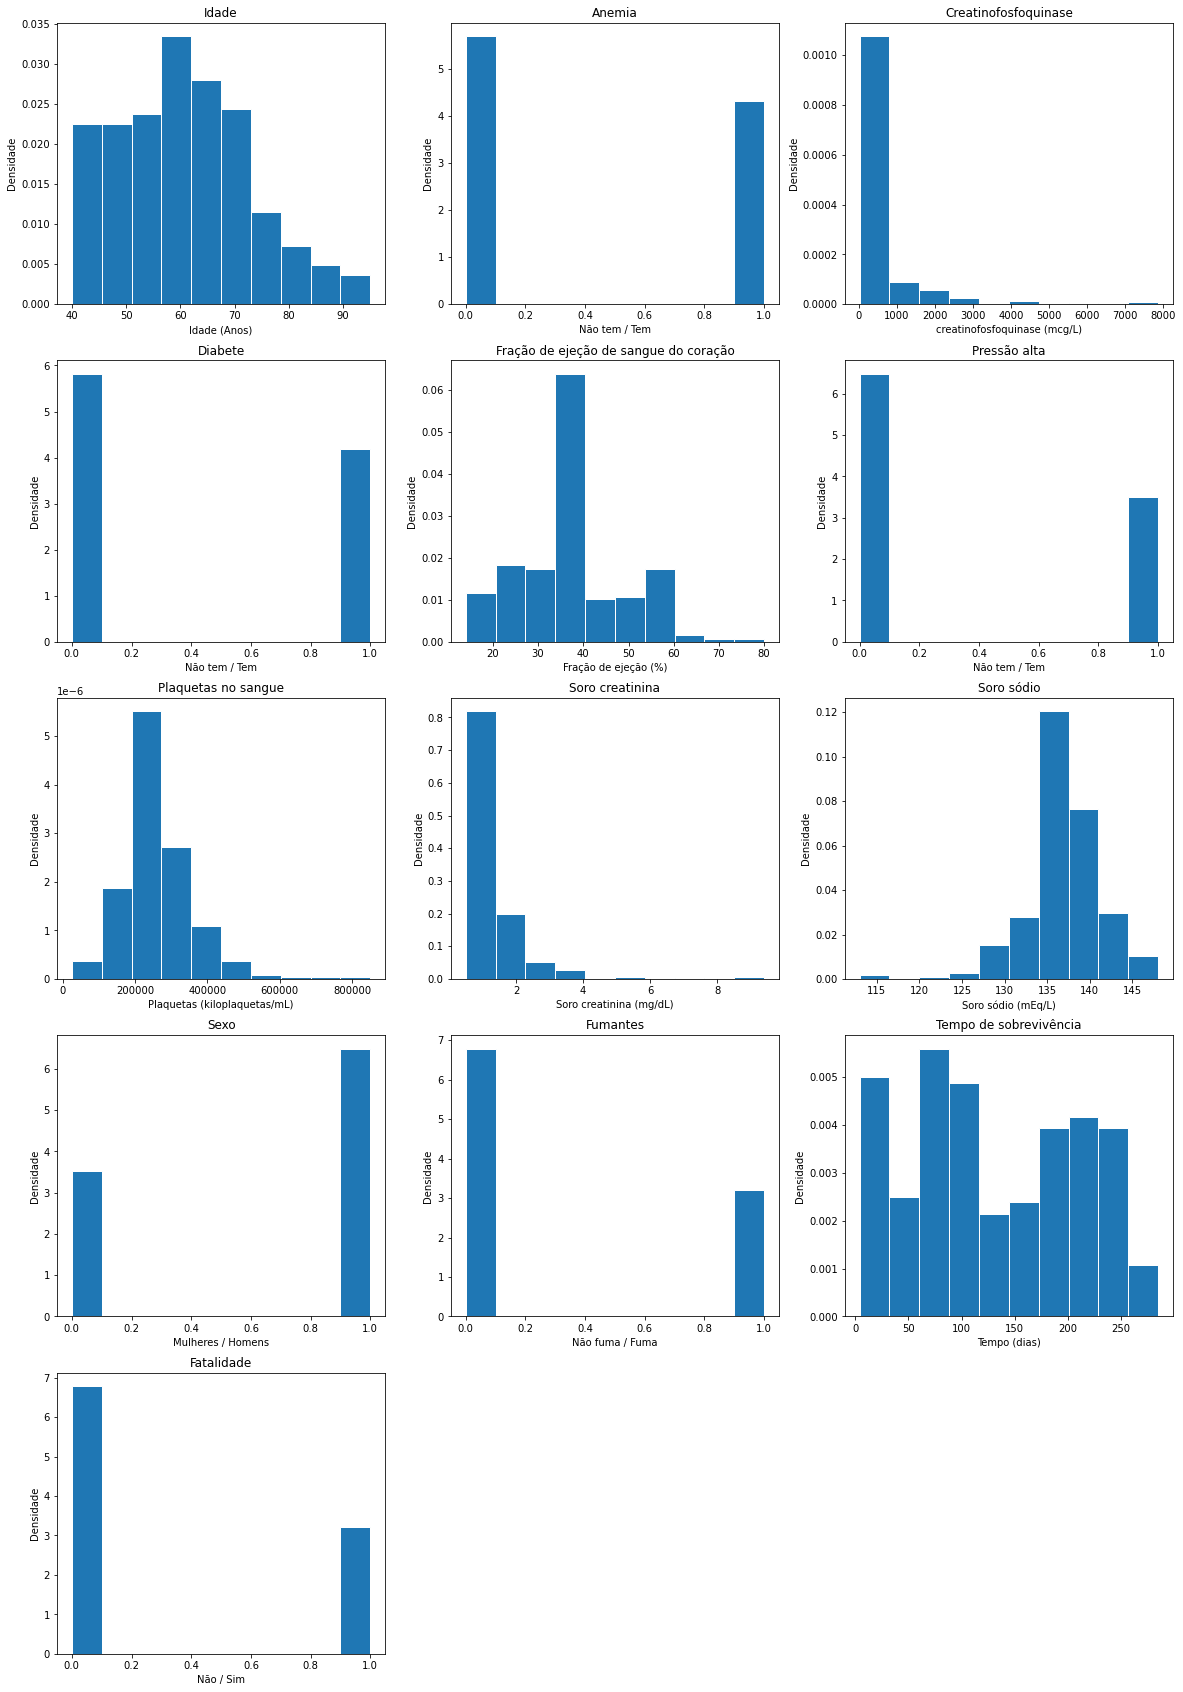

In [3]:
# FREQUÊNCIA DAS VARIÁVEIS QUANTITATIVAS

plt.figure(figsize=(20, 30))

plt.subplot(531)
plt.hist(dados.age, edgecolor='white', density=True)
plt.title('Idade')
plt.xlabel('Idade (Anos)')
plt.ylabel('Densidade')

plt.subplot(532)
plt.hist(dados.anaemia, edgecolor='white', density=True)
plt.title('Anemia')
plt.xlabel('Não tem / Tem')
plt.ylabel('Densidade')

plt.subplot(533)
plt.hist(dados.creatinine_phosphokinase, edgecolor='white', density=True)
plt.title('Creatinofosfoquinase')
plt.xlabel('creatinofosfoquinase (mcg/L)')
plt.ylabel('Densidade')

plt.subplot(534)
plt.hist(dados.diabetes, edgecolor='white', density=True)
plt.title('Diabete')
plt.xlabel('Não tem / Tem')
plt.ylabel('Densidade')

plt.subplot(535)
plt.hist(dados.ejection_fraction, edgecolor='white', density=True)
plt.title('Fração de ejeção de sangue do coração')
plt.xlabel('Fração de ejeção (%)')
plt.ylabel('Densidade')

plt.subplot(536)
plt.hist(dados.high_blood_pressure, edgecolor='white', density=True)
plt.title('Pressão alta')
plt.xlabel('Não tem / Tem')
plt.ylabel('Densidade')

plt.subplot(537)
plt.hist(dados.platelets, edgecolor='white', density=True)
plt.title('Plaquetas no sangue')
plt.xlabel('Plaquetas (kiloplaquetas/mL)')
plt.ylabel('Densidade')

plt.subplot(538)
plt.hist(dados.serum_creatinine, edgecolor='white', density=True)
plt.title('Soro creatinina')
plt.xlabel('Soro creatinina (mg/dL)')
plt.ylabel('Densidade')

plt.subplot(539)
plt.hist(dados.serum_sodium, edgecolor='white', density=True)
plt.title('Soro sódio')
plt.xlabel('Soro sódio (mEq/L)')
plt.ylabel('Densidade')

plt.subplot(5,3,10)
plt.hist(dados.sex, edgecolor='white', density=True)
plt.title('Sexo')
plt.xlabel('Mulheres / Homens')
plt.ylabel('Densidade')

plt.subplot(5,3,11)
plt.hist(dados.smoking, edgecolor='white', density=True)
plt.title('Fumantes')
plt.xlabel('Não fuma / Fuma')
plt.ylabel('Densidade')

plt.subplot(5,3,12)
plt.hist(dados.time, edgecolor='white', density=True)
plt.title('Tempo de sobrevivência')
plt.xlabel('Tempo (dias)')
plt.ylabel('Densidade')

plt.subplot(5,3,13)
plt.hist(dados.DEATH_EVENT, edgecolor='white', density=True)
plt.title('Fatalidade')
plt.xlabel('Não / Sim')
plt.ylabel('Densidade')

plt.show()

Agora, vamos pegar alguns valores numéricos das variáveis quantitativas, como quantidade de dados disponível(count), média(mean), desvio padrão(std), quartis (valor que está a 1/4 do começo - primeiro quartil(25%), valor do meio - mediana(50%), e valor que está a 3/4 do começo - terceiro quartil(75%) e valor mínimo(min) e máximo(max).

In [4]:
dados.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [5]:
dados.creatinine_phosphokinase.describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

In [6]:
dados.ejection_fraction.describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [7]:
dados.platelets.describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

In [8]:
dados.serum_creatinine.describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [9]:
dados.serum_sodium.describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

In [10]:
dados.time.describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

Utilizando o pairplot da biblioteca seaborn, vamos visualizar uma comparação entre cada variável do dataset, comparando com nosso target, que é a morte do paciente, para ver se há uma correlação forte ou fraca entre elas, e quando comparado com a própria variável, cria-se um histograma com a frequência dos valores das variáveis.

O azul representa as pessoas que não morreram e o laranja as pessoas que morreram.

In [11]:
# sns.pairplot(dados, hue="DEATH_EVENT")

A partir dos histogramas, parece que as pessoas com uma idade mais avançada morrem mais do que pessoas com idade menor, as pessoas com anemia também têm uma tendência maior de morte, já as pessoas com baixo nível de concentração de fosfocreatinina não tem como concluir se é bom ou ruim ter baixo nível, pois a taxa de morte é bem parecida para as pessoas com baixo, ou alto nível de concentração de fosfocreatinina. As pessoas com diabete parecem ter maior chance de sobrevivência, comparadas com pessoas que não têm, porém parece que a dibete influencia muito na morte, pois a taxa de sobrevivência é maior tanto dentre as pessoas com diabete, quanto sem.. Agora, quem têm baixa taxa de ejeção de sangue pelo coração têm mais chance de morrer. Vemos também que a taxa de sobrevivência é maior entre as pessoas que não têm pressão alta. Já a alta quantidade de plaquetas no sangue dá uma maior chance de sobrevivência ao paciente. Em relação a concentração de soro creatinina, quanto menor, maior a probabilidade de sobreviver, o contrário em relação a concentração de soro sódio, que quanto menor, mais chance de morte. Vemos entre os homens, assim como entre os não fumantes a maior quantidade de ataques cardíacos, e aparentemente a maior taxa de sobrevivência. E, por fim, em relação ao tempo, vemos que qunato mais tempo passou, maior a chance de sobrevivência.

Agora, em relação aos gráficos de correlação entre as variáveis não têm como tirar alguma conclusão, portanto partimos para a criação de um mapa de calor da correlação entre as variáveis, também a partir dos dados de morte.

Quanto mais escuro o quadradinho, menor é a correlação entre as variáveis.

In [12]:
dados.groupby('DEATH_EVENT').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [42]:
dados.groupby('DEATH_EVENT').value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [13]:
c = dados.corr()

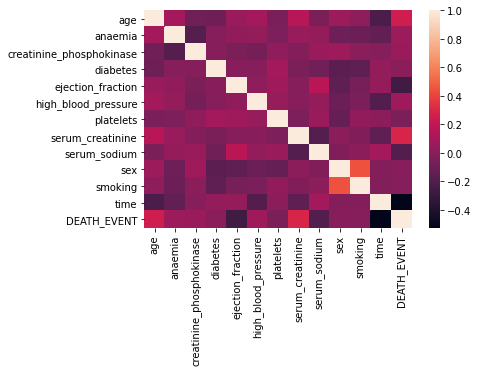

In [14]:
sns.heatmap(c)

## Modelos de Predição

Para fazermos a predição se o paciente sobreviverá após o ataque cardíaco, vamos fazer três modelos de machine learning - a regressão logística, a árvore de decisão (decision tree) e a random forest - afim de compararmos qual dos três é mais eficiente em realizar as previsões que queremos, e tirar conclusões a partir disso.

## Regressão logística

**Descrição**

A regressão logística é um modelo de predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis qualitativas, ou quantitativas.

A equação da probabilidade da regressão logística é escrita da seguinte forma:
<left><img src="EquacaoLogistica.png" width=250 style="float: center; margin: 0px 0px 10px 10px">
    
Em que $\beta_0$ e $\beta_1$ são constantes que descobrimos a partir da base de dados, ou que são dadas.
    
Essa equação gera uma curva em formato de 's', como mostrado a seguir, em que vai do 0 para o 1 (binários), e observamos se determinado ponto tem mais chance de ser relacionado ao 0, ou ao 1, vendo em que parte da curva que está, e assim temos a nossa probabilidade.
    
<center><img src="GraficoLogistica.jpg" width=250 style="float: center; margin: 0px 0px 10px 10px"> 
<center><b>Figura 1: gráfico originado pela regressão logística</b></center>

**Implementando no nosso modelo**

Para a nossa base de dados, faremos toda essa conta a partir das funções da biblioteca "statsmodel", então começamos criando uma função para fazer a conta com as constantes adicionadas a partir da análise da nossa base de dados. 

In [15]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.Logit(Y,X_cp.astype(float))
    results = model.fit()
    
    return results

Começamos implementando o modelo para toda a nossa base de dados para vermos quais são as variáveis independentes que mais tem impacto variável dependente, a partir de um valor $\alpha$ definido por nós, e as variáveis independentes que tiverem um valor menor que $\alpha$ são as variáveis que mais tem influência na nossa variável dependente. 

A partir dessa análise, filtraremos o nosso dataset para deixar apenas as variáveis com maior influência, de modo a aumentar e eficácia de nosso modelo.

In [16]:
X = dados[['age', 'anaemia','creatinine_phosphokinase', 'diabetes', 'ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium','sex','smoking','time']]
Y = dados['DEATH_EVENT']

results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.4151
Time:                        15:54:11   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902      21.272
age                          0.0474      0.016      3.001      0.003       0.016       0.078
anaemia                     -0.0075      0.360     -0.021      0.983      -0.714       0.699
creatinine_phosphokinase     0.0002      0.000      1.249      0.212      -0.000       0.001
diabetes                     0.1451      0.351      0.413      0.679      -0.543       0.833
ejection_fraction           -0.0767      0.016     -4.695      0.000      -0.109      -0.045
high_blood_pressure         -0.1027      0.359     -0.286      0.775      -0.806       0.600
platelets                  -1.2e-06   1.89e-06     -0.635      0.525    -4.9e-06     2.5e-06
serum_creatinine             0.6661      0.181      3.670      0.000       0.310       1.022
serum_sodium                -0.0670      0.040     -1.686      0.092      -0.145       0.011
sex                         -0.5337      0.414     -1.289      0.197      -1.345       0.278
smoking                     -0.0135      0.413     -0.033      0.974      -0.822       0.795
time                        -0.0210      0.003     -6.981      0.000      -0.027      -0.015
============================================================================================
"""

**Explicando as colunas do resultado da função**

- coef = valor das constantes de acordo com cada variável independente
- std err = valor do desvio padrão e erro do modelo.
- z = 
- P>|z| = valor-p da variável independente - a partir dos valores dessa coluna comparamos com o $\alpha$, para ver se tem uma forte ou fraca influência na variável dependente.
- [0.025  

**Analisando os valores**

Verifica-se que os fatores que mais influenciam na fatalidade são: idade, fração de ejeção, soro creatinina e tempo.

Mais para frente no código, filtraremos nosso dataset, para deixar apenas essas variáveis, para melhorar a acurácia de nosso modelo.

Após verificar as variáveis que mais influenciam a fatalidade, dividimos o dataframe em uma base de <b>treinamento</b> e outra de <b>teste</b>, a fim de verificar a eficácia do modelo logístico não apenas para adequação na base de dados, mas também na predição. 

In [1]:
# Separando o modelo em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

NameError: name 'X' is not defined

In [ ]:
# Implementando o modelo logístico apenas para a base de treinamento
new_results = regress(Y_train,X_train)
new_results.summary()

In [19]:
# Utilizando o modelo para predição na base de testes
X_cp = sm.add_constant(X_test)
Y_pred = new_results.predict(X_cp)
Y_pred = 1*(Y_pred>0.5)

#### Acurácia

In [20]:
# Verficação da acurácia
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print('Acurácia do classificador de regressão logística na base de teste: {:.2f}'.format(logreg.score(X_test, Y_test)))

Acurácia do classificador de regressão logística na base de teste: 0.77


#### Matriz de confusão

--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


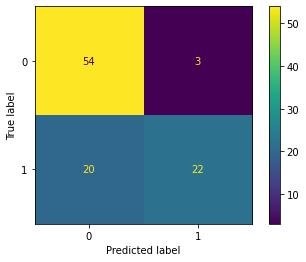

In [21]:
from sklearn.metrics import plot_confusion_matrix

print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
plot_confusion_matrix(logreg, X_test, Y_test)
plt.show()

Esse resultado indica que temos 54+22 previsões corretas e 20+3 previsões incorretas.

#### Iteração

Nota-se que, como há 76 previsões corretas e 23 incorretas, o modelo não é muito preciso. Fazendo a iteração citada acima chegamos nos seguintes valores:

In [22]:
X_iterado = dados[['age', 'ejection_fraction', 'serum_sodium','time']]
Y_iterado = dados['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_iterado_train, X_iterado_test, Y_iterado_train, Y_iterado_test = train_test_split(X_iterado, Y_iterado, test_size=0.33, random_state=42)

results_iterado = regress(Y_iterado_train,X_iterado_train)
results_iterado.summary()

Optimization terminated successfully.
         Current function value: 0.375732
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  200
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Nov 2020   Pseudo R-squ.:                  0.3558
Time:                        15:54:11   Log-Likelihood:                -75.146
converged:                       True   LL-Null:                       -116.65
Covariance Type:            nonrobust   LLR p-value:                 4.008e-17
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.0995      6.846      1.914      0.056      -0.318      26.517
age                   0.0459      0.020      2.346      0.019       0.008       0.084
ejection_fraction    -0.0560      0.019     -2.906      0.004      -0.094      -0.018
serum_sodium         -0.0921      0.048     -1.901      0.057      -0.187       0.003
time                 -0.0208      0.004     -5.841      0.000      -0.028      -0.014
=====================================================================================
"""

In [23]:
X_iterado_cp = sm.add_constant(X_iterado_test)
Y_iterado_pred = results_iterado.predict(X_iterado_cp)
Y_iterado_pred = 1*(Y_iterado_pred>0.5)

In [24]:
# Verficação da acurácia da nova base de dados
logreg.fit(X_iterado_train, Y_iterado_train)
print('Acurácia do classificador de regressão logística na base de teste iterada: {:.2f}'.format(logreg.score(X_iterado_test, Y_iterado_test)))

Acurácia do classificador de regressão logística na base de teste iterada: 0.83


Logo nota-se que a acurácia do novo modelo é 6% maior do que a base de dados original, que considerava todas as variáveis. Vamos verificar, ainda, como se apresenta a nova matriz de confusão.

--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


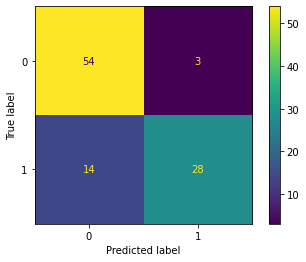

In [25]:
print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
logreg_iterado = logreg.fit(X_iterado_train, Y_iterado_train)
plot_confusion_matrix(logreg_iterado, X_iterado_test, Y_iterado_test)
plt.show()

Esse resultado indica que temos 54+28 previsões corretas e 14+3 previsões incorretas.

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

destree = DecisionTreeClassifier(random_state=1)
destree = destree.fit(X_train,Y_train)

Y_decision_pred = destree.predict(X_test)
Y_decision_pred = pd.Series(Y_decision_pred)

#### Acurácia

In [27]:
print('Acurácia do classificador Decision Tree na base de teste: {:.2f}'.format(destree.score(X_test, Y_test)))

Acurácia do classificador Decision Tree na base de teste: 0.68


#### Matriz de confusão

--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


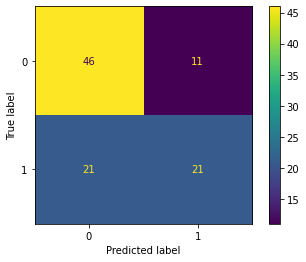

In [28]:
print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
plot_confusion_matrix(destree, X_test, Y_test)

#### Iteração

Assim como feito no modelo de regressão logística, aqui também filtramos os dados, para melhorar a acurácia do modelo.

In [29]:
destree_iterado = DecisionTreeClassifier(random_state=1)
destree_iterado = destree.fit(X_iterado_train,Y_iterado_train)

Y_decision_iterado_pred = destree_iterado.predict(X_iterado_test)
Y_decision_iterado_pred = pd.Series(Y_decision_iterado_pred)

In [30]:
print('Acurácia do classificador Desicion Forest na base de teste iterada: {:.2f}'.format(destree_iterado.score(X_iterado_test, Y_iterado_test)))

Acurácia do classificador Desicion Forest na base de teste iterada: 0.79


--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


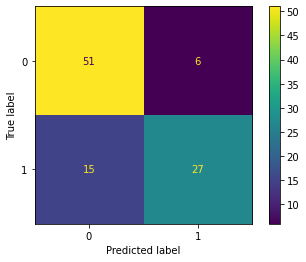

In [31]:
print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
plot_confusion_matrix(destree_iterado, X_iterado_test, Y_iterado_test)

Vemos que após a iteração, acurácia aumentou em 11%, ficando com acurácia de 79%.

## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs=-1)
randfor = randfor.fit(X_train,Y_train)

Y_random_pred = randfor.predict(X_test)
Y_random_pred = pd.Series(Y_random_pred)
Y_random_pred = 1*(Y_random_pred>0.5)

#### Acurácia

In [33]:
print('Acurácia do classificador Random Forest na base de teste: {:.2f}'.format(randfor.score(X_test, Y_test)))

Acurácia do classificador Random Forest na base de teste: 0.77


#### Matriz de confusão

--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


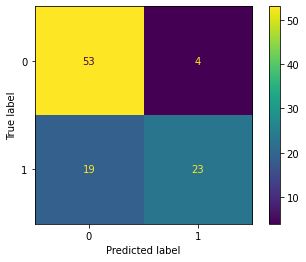

In [36]:
print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
plot_confusion_matrix(randfor, X_test, Y_test)
plt.show()

#### Iteração

In [38]:
randfor_iterado = RandomForestClassifier(n_estimators = 1000, random_state = 42,n_jobs=-1)
randfor_iterado = randfor_iterado.fit(X_iterado_train,Y_iterado_train)

Y_random_iterado_pred = randfor_iterado.predict(X_iterado_test)
Y_random_iterado_pred = pd.Series(Y_random_iterado_pred)
Y_random_iterado_pred = 1*(Y_random_iterado_pred>0.5)

In [39]:
print('Acurácia do classificador Random Forest na base de teste iterada: {:.2f}'.format(randfor_iterado.score(X_iterado_test, Y_iterado_test)))

Acurácia do classificador Random Forest na base de teste iterada: 0.79


--------------------------
Legenda
0: morreu
1: sobreviveu
--------------------------


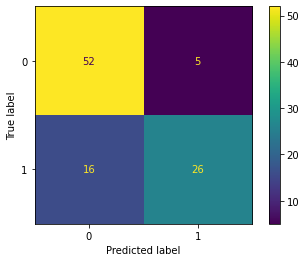

In [40]:
print("--------------------------")
print("Legenda")
print("0: morreu")
print("1: sobreviveu")
print("--------------------------")
plot_confusion_matrix(randfor_iterado, X_iterado_test, Y_iterado_test)
plt.show()

Verificamos que após a iteração, a acurácia do nosso modelo aumentou em 2%.

**Análise Final**

Comparando os três modelos após a iteração, vemos que o modelo ideal é a regressão logística por ter uma acurácia de 83%, contra 79% da Decision Tree e da Random Forest.

Já analisando as matrizes de confusão, a regressão logística preveu corretamente a morte de 54 pacientes, e a sobrevivência de 28 pacientes, contra a previsão de morte que não ocorreu de 14 pacientes, e a previsão de sobrevência errônea de 3 pacientes.

A da Decision Tree teve 51 acertos de morte, e 27 acertos de sobrevivência, contra 15 pacientes com previsão de morte que não ococrreu, e 6 pacientes de sobrevivência que não aconteceu.

Vendo a matriz de confusão da Random Forest, o modelo previu corretamente a morte de 52 pacientes, e sobrevivência de 26 pacientes, contra as predições errôneas de morte de 16 pacientes, e de sobrevivência de 5 pacientes.

Utilizando a previsão de sobrevivência como o ponto que definirá qual modelo é o melhor entre a Decision Tree e a Random Forest, pelo fato de ser mais difícil de prever a sobrevivência, pois há menos pacientes que sobreviveram, sendo assim, a Decision Tree é a melhor, pois acertou a sobrevivência de um paciente a mais comparado coma Random Forest.

Sendo assim, o ranking de qualidade dos nossos modelos ficou assim:

    1 Regressão Logística
    
    2 Decision Tree
    
    3 Random Forest

E após toda essa análise, conseguimos responder a nossa pergunta se o paciente sobreviverá após o ataque cardíaco, com uma boa acurácia de nossos modelos.

In [ ]:
O modelo utilizado foi adequado para responder nossa pergunta?

Conseguimos prever com 80% de acerto se a pessoa vai sobreviver

Interpretação da matriz de confusão